% iDK

In [6]:
import numpy as np
import pandas as pd
import joblib

!pip install ydata-profiling

In [7]:
# importing all the packages

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from random import random
import scipy.stats as stats
import math
import time


import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.express as px

from scipy.stats import randint

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error,classification_report,confusion_matrix
from ydata_profiling import ProfileReport

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing the dataset

In [9]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/combined_dataset.csv')  #read data and stores data as a dataframe

# Data insight

In [10]:
df.head()   #shows the first 5 rows of the dataframe

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,www.voting-yahoo.com,10000000,0,0,0,20,0,0,1,20,2,1
1,www.zvon.org/xxl/WSDL1.1/Output/index.html,194914,0,1,7305,42,0,0,0,12,2,0
2,tecportais.com/file-security-update-infonfmati...,10000000,0,0,0,155,0,0,0,14,1,1
3,bima.astro.umd.edu/nemo/linuxastro/,7001,0,0,0,35,0,0,0,18,3,0
4,huarui-tec.com/js/?us.battle.net/login/en/?ref...,10000000,0,1,730,79,0,0,1,14,1,1


In [11]:
df.shape

(95910, 12)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   domain          95910 non-null  object
 1   ranking         95910 non-null  int64 
 2   isIp            95910 non-null  int64 
 3   valid           95910 non-null  int64 
 4   activeDuration  95910 non-null  int64 
 5   urlLen          95910 non-null  int64 
 6   is@             95910 non-null  int64 
 7   isredirect      95910 non-null  int64 
 8   haveDash        95910 non-null  int64 
 9   domainLen       95910 non-null  int64 
 10  nosOfSubdomain  95910 non-null  int64 
 11  label           95910 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 8.8+ MB


In [13]:
df.isna().sum()     #displays the total numbers of missing value

#Since our dataset has no missing values, we did not handle missing values.

,0
domain,0
ranking,0
isIp,0
valid,0
activeDuration,0
urlLen,0
is@,0
isredirect,0
haveDash,0
domainLen,0


In [14]:
#for unique identifier
# we are adding here an column named 'ID'
df['ID'] = np.arange(len(df))

#arranging that column
cols = list(df.columns)
cols = [cols[-1]] + cols[:-1]
df = df[cols]

In [15]:
df.head()

,ID,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,0,www.voting-yahoo.com,10000000,0,0,0,20,0,0,1,20,2,1
1,1,www.zvon.org/xxl/WSDL1.1/Output/index.html,194914,0,1,7305,42,0,0,0,12,2,0
2,2,tecportais.com/file-security-update-infonfmati...,10000000,0,0,0,155,0,0,0,14,1,1
3,3,bima.astro.umd.edu/nemo/linuxastro/,7001,0,0,0,35,0,0,0,18,3,0
4,4,huarui-tec.com/js/?us.battle.net/login/en/?ref...,10000000,0,1,730,79,0,0,1,14,1,1


# Additional visualizations from the notebook

In [16]:
#Profile Report is very amazing function and it display detailed information of everycolumn of the dataset

ProfileReport(df,minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:02<00:00,  6.14it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
df.columns

Index(['ID', 'domain', 'ranking', 'isIp', 'valid', 'activeDuration', 'urlLen',
       'is@', 'isredirect', 'haveDash', 'domainLen', 'nosOfSubdomain',
       'label'],
      dtype='object')

#Correlation Matrix

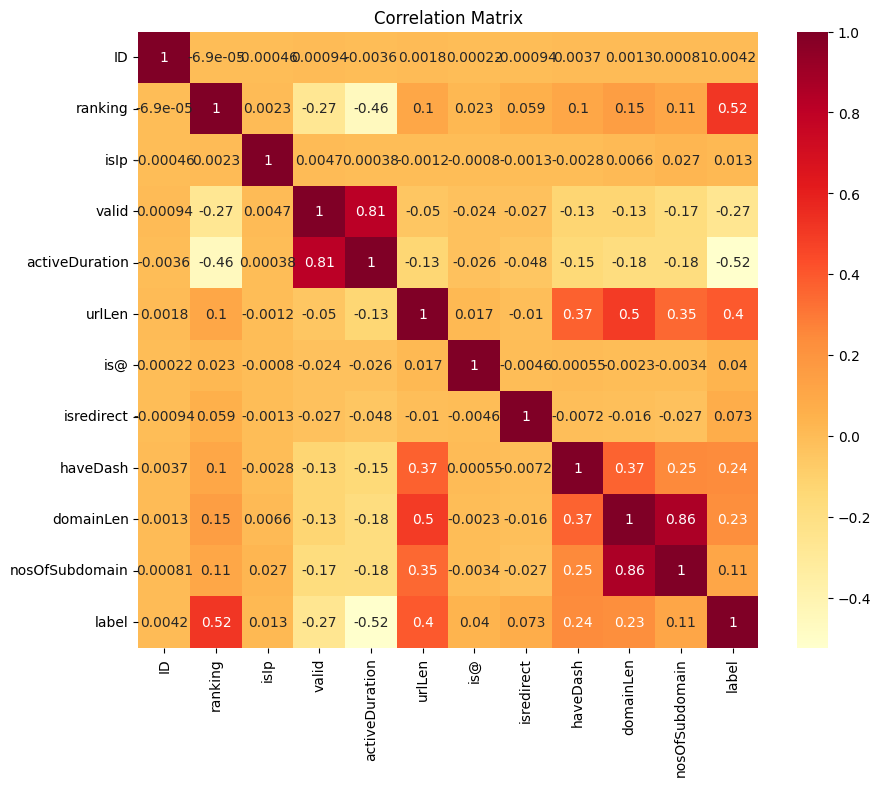

In [18]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), cmap='YlOrRd', annot=True)
plt.title('Correlation Matrix')
plt.show()


In [19]:
df_tmp=df.copy()

# Data Preprocessing

In [20]:
# convert the string data to categorical data type
for label,content in  df.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label]=content.astype('category').cat.as_ordered()

In [21]:
# our dataset now contains no string type datatype
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ID              95910 non-null  int64   
 1   domain          95910 non-null  category
 2   ranking         95910 non-null  int64   
 3   isIp            95910 non-null  int64   
 4   valid           95910 non-null  int64   
 5   activeDuration  95910 non-null  int64   
 6   urlLen          95910 non-null  int64   
 7   is@             95910 non-null  int64   
 8   isredirect      95910 non-null  int64   
 9   haveDash        95910 non-null  int64   
 10  domainLen       95910 non-null  int64   
 11  nosOfSubdomain  95910 non-null  int64   
 12  label           95910 non-null  int64   
dtypes: category(1), int64(12)
memory usage: 11.7 MB


# Label encoding for categorical features

In [22]:
#convert categorical data type to int data type
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label]=pd.Categorical(content).codes+1

In [23]:
#now all data is in int data types
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              95910 non-null  int64
 1   domain          95910 non-null  int32
 2   ranking         95910 non-null  int64
 3   isIp            95910 non-null  int64
 4   valid           95910 non-null  int64
 5   activeDuration  95910 non-null  int64
 6   urlLen          95910 non-null  int64
 7   is@             95910 non-null  int64
 8   isredirect      95910 non-null  int64
 9   haveDash        95910 non-null  int64
 10  domainLen       95910 non-null  int64
 11  nosOfSubdomain  95910 non-null  int64
 12  label           95910 non-null  int64
dtypes: int32(1), int64(12)
memory usage: 9.1 MB


# Missing data handling

In [24]:
#also our dataset contains zero missing vaules , so we can now proceed with modelling
df_tmp.isna().sum()

,0
ID,0
domain,0
ranking,0
isIp,0
valid,0
activeDuration,0
urlLen,0
is@,0
isredirect,0
haveDash,0


# Modeling of the dataset

In [25]:
# 1. Splitting the dataset into features (x) and target (y)
x = df_tmp.drop('label', axis=1)  # Features (all columns except 'label')
y = df_tmp['label']  # Target variable (label)


# 2. Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)


# 3. Scale features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  # Fit on train and transform train
x_test_scaled = scaler.transform(x_test)  # Only transform test data


# 4. Balance the dataset using SMOTE (Synthetic Minority Over-sampling Technique)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = sm.fit_resample(x_train_scaled, y_train)


# Check the new shape of resampled data
print(f"Original training set size: {x_train.shape}")
print(f"Resampled training set size: {x_train_resampled.shape}")


Original training set size: (76728, 12)
Resampled training set size: (89462, 12)


In [26]:
# 1. Import the required libraries for models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# 2. Define the models dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'Linear SVC': LinearSVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}


# Train and evaluate all models


In [27]:
# Model Training and Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize an empty list to store performance metrics
model_performance = []

# Iterate through the models
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(x_train_resampled, y_train_resampled)  # Train on resampled data
    y_pred = model.predict(x_test_scaled)  # Predict on the scaled test data

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print detailed classification report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))

    # Append performance metrics to the list
    model_performance.append([name, accuracy, precision, recall, f1])

# Print performance of all models
print("\nModel Performance Summary:")
for performance in model_performance:
    print(performance)



Training Logistic Regression...

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      7999
           1       0.92      0.89      0.90     11183

    accuracy                           0.89     19182
   macro avg       0.89      0.89      0.89     19182
weighted avg       0.89      0.89      0.89     19182


Training Linear SVC...

Classification Report for Linear SVC:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      7999
           1       0.92      0.89      0.90     11183

    accuracy                           0.89     19182
   macro avg       0.89      0.89      0.89     19182
weighted avg       0.89      0.89      0.89     19182


Training Decision Tree...

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7999
           1       0.96 

# Create performance comparison DataFrame


In [28]:
model_performance_df = pd.DataFrame(
    model_performance,
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score']
)
print("\nModel Performance Comparison:")
print(model_performance_df)


Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.890366   0.922168  0.886792  0.904135
1           Linear SVC  0.891096   0.923765  0.886345  0.904668
2        Decision Tree  0.947034   0.956206  0.952785  0.954493
3        Random Forest  0.961214   0.965486  0.968077  0.966780
4    Gradient Boosting  0.935252   0.951905  0.936243  0.944009
5                  KNN  0.926441   0.950655  0.921667  0.935936
6          Naive Bayes  0.577468   0.995812  0.276402  0.432701


 So we have triend and tested few models and algorithms to get best results: accuracy_score ,etc. and we found that RandomForestClassifier is the best model we found.

Now, we can also tune the hyperparameters for better results.

# Best performer further tuning to improve best and worst

#Linear SVC

In [29]:
# using the linear regression model.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

np.random.seed(42)
linear_model=LinearSVC()
linear_model.fit(x_train,y_train)

LinearSVC()

In [30]:
np.random.seed(42)
linear_model.score(x_test,y_test)

0.793504326973204

# RandomForestClassifier

In [31]:
np.random.seed(42)
model=RandomForestClassifier(n_jobs=1)
model.fit(x_train,y_train)

RandomForestClassifier(n_jobs=1)

In [32]:
np.random.seed(42)
model_score=model.score(x_test,y_test)
model_score

0.9635595871129183

In [33]:
# Set random seed
np.random.seed(42)

# Parameter grid
param_grid = {
    'n_estimators': [10, 100, 200, 500],
    'max_depth': [None, 5, 10, 50, 100],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

# Initialize base model
rf_model = RandomForestClassifier(random_state=42, n_jobs=1)

# RandomizedSearchCV
print("Starting RandomizedSearchCV...")
start_time = time.time()

rs_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    # n_iter=10,  # Uncomment to specify number of iterations
    cv=5,
    verbose=2,
    random_state=42
)

# Fit the model
rs_rf.fit(x_train, y_train)
search_time = time.time() - start_time

# Print results
print("\n=== RandomizedSearchCV Results ===")
print("Time taken:", round(search_time, 2), "seconds")
print("Best parameters:", rs_rf.best_params_)
print("Best cross-validation score:", round(rs_rf.best_score_, 4))
print("Test set score:", round(rs_rf.score(x_test, y_test), 4))

# Save best model
best_model = rs_rf.best_estimator_

Starting RandomizedSearchCV...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  19.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  20.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, 

### Randomized Search CV and Grid Search CV



In [34]:
np.random.seed(42)

grid={'classifier__n_estimators':[10,100,200,500],
      'classifier__max_depth':[None,5,10,50,100],
      'classifier__max_features':['auto','sqrt'],
      'classifier__max_sample_split':[2,5,10],
      'classifier__min_sample_leaf':[1,5,10]
}

### K-Nearest Neighbors Classifier

In [35]:
# Trying K-NN Classifier model
np.random.seed(42)
neigh=KNeighborsClassifier()
neigh.fit(x_train,y_train)

KNeighborsClassifier()

In [36]:
np.random.seed(42)
neigh_score=neigh.score(x_test,y_test)
neigh_score

0.8784276926285058

In [37]:
grid_neigh={'n_neighbors':[1,5],
    'weights':['uniform','distance'],
    'algorithm':['auto'],
    'leaf_size':[10,30],
    'p':[3,7],


    }

In [38]:
rs_neigh=RandomizedSearchCV(estimator=neigh,
                           param_distributions=grid_neigh,
#                            n_iter=10,
                           cv=5,
                           verbose=2)

rs_neigh.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END algorithm=auto, leaf_size=10, n_neighbors=1, p=3, weights=uniform; total time=   1.9s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=1, p=3, weights=uniform; total time=   2.4s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=1, p=3, weights=uniform; total time=   2.0s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=1, p=3, weights=uniform; total time=   1.8s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=1, p=3, weights=uniform; total time=   2.0s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=1, p=3, weights=distance; total time=   1.0s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=1, p=3, weights=distance; total time=   1.0s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=1, p=3, weights=distance; total time=   0.8s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=1, p=3, weights=distance; total time=   1.0s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=1, p=3, weights=distance; tot

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto'],
                                        'leaf_size': [10, 30],
                                        'n_neighbors': [1, 5], 'p': [3, 7],
                                        'weights': ['uniform', 'distance']},
                   verbose=2)

In [ ]:
rs_neigh_grid=GridSearchCV(estimator=neigh,
                           param_grid=grid_neigh,
                           cv=5,
                           verbose=2
                           )
rs_neigh_grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END algorithm=auto, leaf_size=10, n_neighbors=1, p=3, weights=uniform; total time=   1.8s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=1, p=3, weights=uniform; total time=   1.9s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=1, p=3, weights=uniform; total time=   2.1s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=1, p=3, weights=uniform; total time=   2.4s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=1, p=3, weights=uniform; total time=   1.8s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=1, p=3, weights=distance; total time=   1.0s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=1, p=3, weights=distance; total time=   1.0s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=1, p=3, weights=distance; total time=   0.8s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=1, p=3, weights=distance; total time=   0.9s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=1, p=3, weights=distance; tot

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto'], 'leaf_size': [10, 30],
                         'n_neighbors': [1, 5], 'p': [3, 7],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [ ]:
rs_neigh_score=rs_neigh.score(x_test,y_test)
rs_neigh_score

0.8786883536648942

In [ ]:
rs_neigh_grid=rs_neigh_grid.score(x_test,y_test)
rs_neigh_grid

0.8786883536648942

#Naive Bayes

In [ ]:
np.random.seed(42)
nb_model=GaussianNB()
nb_model.fit(x_train,y_train)
pred_nb=nb_model.predict(x_test)
nb_model1=nb_model.score(x_test,y_test)
nb_model1

0.8282243770201231

In [ ]:
np.random.seed(42)
print(accuracy_score(pred_nb,y_test))
print(confusion_matrix(pred_nb,y_test))
print(classification_report(pred_nb,y_test))

0.8282243770201231
[[6721 1926]
 [1369 9166]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      8647
           1       0.83      0.87      0.85     10535

    accuracy                           0.83     19182
   macro avg       0.83      0.82      0.83     19182
weighted avg       0.83      0.83      0.83     19182

